In [2]:
import numpy as np
import matplotlib.pyplot as plt
def u(t):
    return np.where(t > 0, 1, 0)

def x(t):
    return np.exp(-0.5 * t) * u(t)

Ts = 0.1

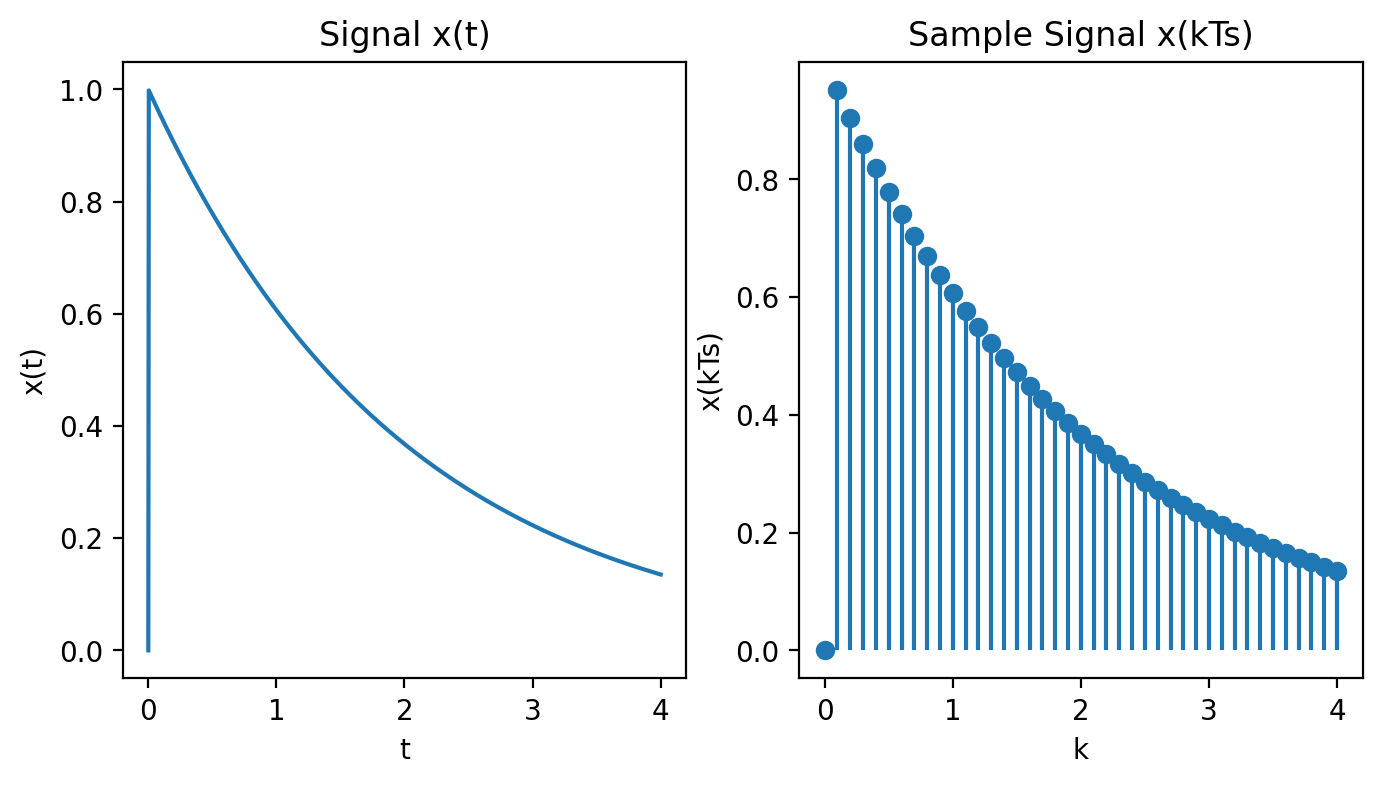

In [3]:
plt.figure(figsize=(8, 4),dpi=200)
n_t = np.linspace(0,4, num=1000)
plt.subplot(1, 2, 1)
plt.plot(n_t, x(n_t))
plt.title('Signal x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')

n_ts = np.linspace(0,4, num=41,endpoint=True)
plt.subplot(1, 2, 2)
plt.stem(n_ts, x(n_ts), basefmt=' ')
plt.title('Sample Signal x(kTs)')
plt.xlabel('k')
plt.ylabel('x(kTs)')

plt.savefig('fig1.png')

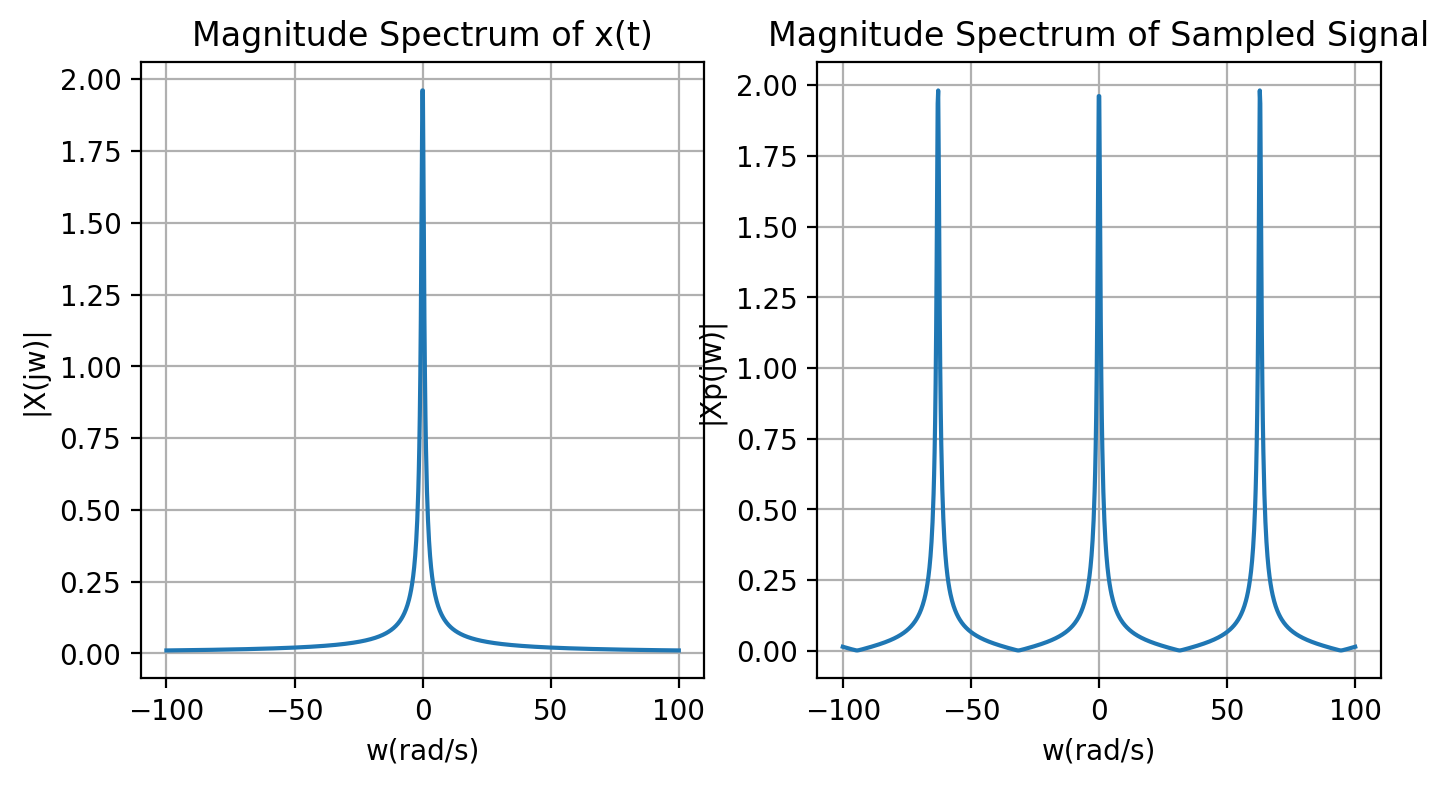

In [4]:
# Define the Fourier Transform of x(t)
def X(w):
    return 1 / (1j * w + 0.5)

# Frequency range
w = np.linspace(-100, 100, 1000)

# Compute the magnitude spectrum |X(jw)|
X_mag = np.abs(X(w))

plt.figure(figsize=(8, 4),dpi=200)
plt.subplot(1, 2, 1)
plt.plot(w, X_mag)
plt.xlabel('w(rad/s)')
plt.ylabel('|X(jw)|')
plt.title('Magnitude Spectrum of x(t)')
plt.grid(True)

def Xp(w):
    return  sum(X(w - k*(2*np.pi/Ts)) for k in range(-100, 101))

# Compute the magnitude spectrum |Xp(jw)|
w_Ts = np.linspace(-100, 100, 1000)
Xp_mag = np.abs(Xp(w_Ts))

# Plotting
plt.subplot(1, 2, 2)
plt.plot(w, Xp_mag)
plt.xlabel('w(rad/s)')
plt.ylabel('|Xp(jw)|')
plt.title('Magnitude Spectrum of Sampled Signal')
plt.grid(True)

plt.savefig('fig2.png')

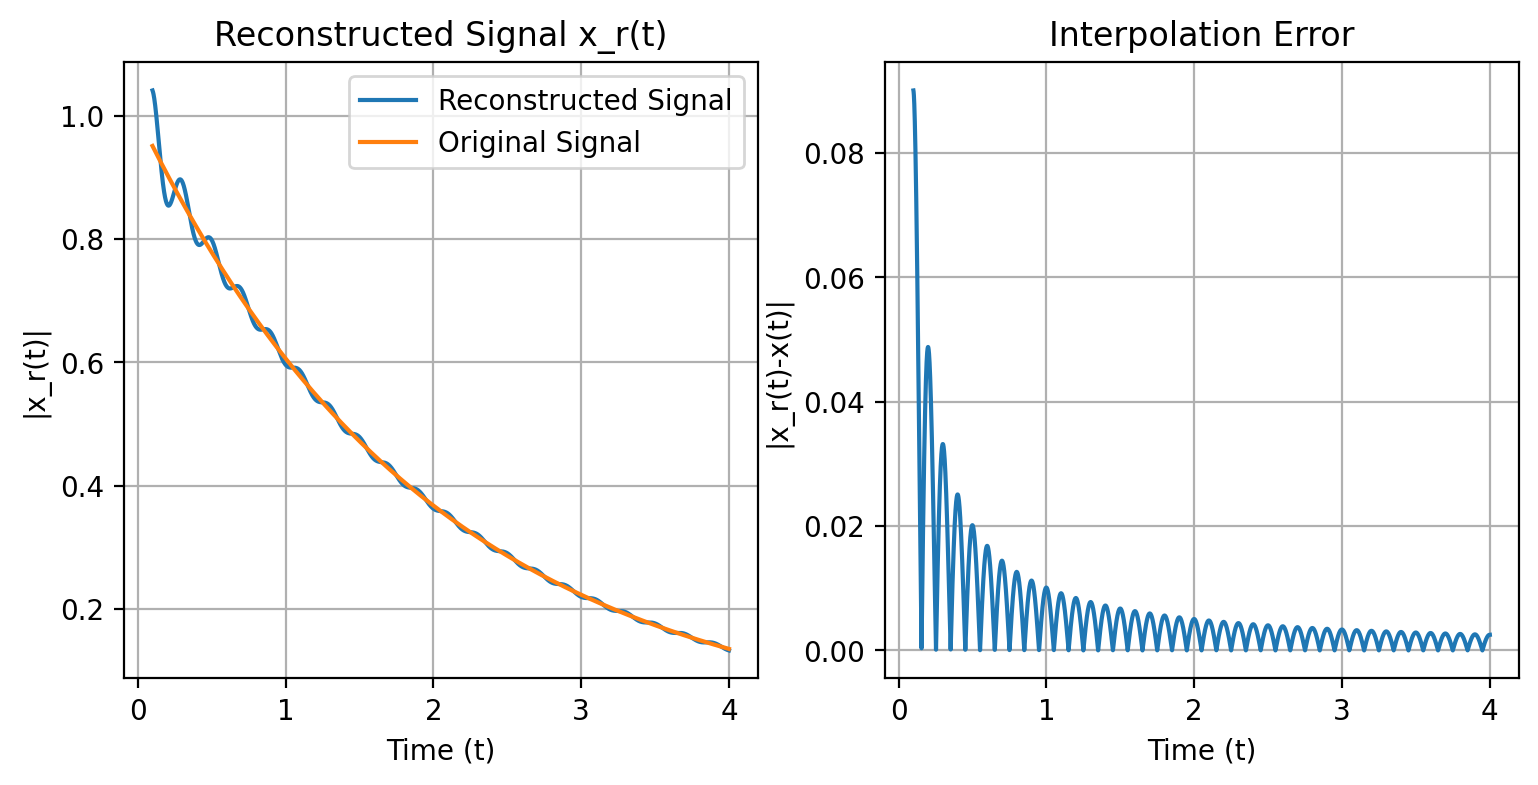

In [6]:
k = np.arange(-100, 101,step=0.1)
x_samples = x(k*Ts)

# Define the reconstruction function xr(t)
def xr(t, wc):
    sum_terms = np.sum(x_samples * (wc*Ts/np.pi) * np.sinc(wc*(t - k*Ts)/np.pi))/10
    return sum_terms

# Time range for reconstruction
t_recon = np.linspace(0.1, 4, 1000,endpoint=True)

# Reconstruct the signal xr(t) for wc=5
wc = 10*np.pi
xr_values = np.array([xr(t, wc) for t in t_recon])

# Plotting the reconstructed signal
plt.figure(figsize=(9, 4),dpi=200)
plt.subplot(1, 2, 1)
plt.plot(t_recon, xr_values, label='Reconstructed Signal')
plt.plot(t_recon, x(t_recon), label='Original Signal')
plt.xlabel('Time (t)')
plt.ylabel('|x_r(t)|')
plt.title('Reconstructed Signal x_r(t)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_recon, np.abs(xr_values-x(t_recon)))
plt.xlabel('Time (t)')
plt.ylabel('|x_r(t)-x(t)|')
plt.title('Interpolation Error')
plt.grid(True)

plt.savefig('fig3.png')